# By : Amira Mohamed Esawy and Yasmin Emad Younis

<font color=blue><b>1- Needed Packages</b></font>

In [28]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from numpy import r_
import math
import scipy
from scipy import signal
from math import cos, pi , sqrt 

%matplotlib inline

<font color=blue><b>2- Matrices</b></font>

In [29]:

quantization_matrix_50 = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                                [12, 12, 14, 19, 26, 58, 60, 55],
                                [14, 13, 16, 24, 40, 57, 69, 56],
                                [14, 17, 22, 29, 51, 87, 80, 62],
                                [18, 22, 37, 56, 68, 109, 103, 77],
                                [24, 35, 55, 64, 81, 104, 113, 92 ],
                                [49, 64, 78, 87, 103, 121, 120, 101],
                                [72, 92, 95,98, 112, 100, 103, 99]])


quantization_matrix_10 = np.array([[80, 60, 50, 80, 120, 200, 255, 255],
                                   [55, 60, 70, 95, 130, 255, 255, 255],
                                   [70, 65, 80, 120, 200, 255, 255, 255],
                                   [70, 85, 110, 145, 255, 255, 255, 255],
                                   [90, 110, 185, 255, 255, 255, 255, 255],
                                   [120, 175, 255, 255, 255, 255, 255, 255 ],
                                   [245, 255, 255, 255, 255, 255, 255, 255],
                                   [255, 255, 255, 255, 255, 255, 255, 255]])

quantization_matrix_90 = np.array([[3, 2, 2, 3, 5, 8, 10, 12],
                                   [2, 2, 3, 4, 5, 12, 12, 11],
                                   [3, 3, 3, 5, 8, 11, 14, 11],
                                   [3, 3, 4, 6, 10, 17, 16, 12],
                                   [4, 4, 7, 11, 14, 22, 21,15],
                                   [5, 7, 11, 13, 16, 12, 23, 18 ],
                                   [10, 13, 16, 17, 21, 24, 24, 21],
                                   [14, 18, 19, 20, 22, 20, 20, 20]])

dct_matrix = np.array([[0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536],
                       [0.4904, 0.4157, 0.2778, 0.0975, -0.975, -0.2778, -0.4157, -0.4904],
                       [0.4619, 0.1913, -0.1913, -0.4619, -0.4619, -0.1913, 0.1913, 0.4619],
                       [0.4157, -0.0975, -0.4904, -0.2778, 0.2778, 0.4904, 0.0975, -0.4157],
                       [0.3536, -0.3536, -0.3536, 0.3536, 0.3536, -0.3536, -0.3536, 0.3536],
                       [0.2778, -0.4904, 0.0975, 0.4157, -0.4157, -0.0975, 0.4904, -0.2778],
                       [0.1913, -0.4619, 0.4619, -0.1913, -0.1913, 0.4619, -0.4619, 0.1913],
                       [0.0975, -0.2778, 0.4157, -0.4904, 0.4904, -0.4157, 0.2778, -0.0975]])



# Functions Used

<font color=blue><b>1- Color Conversion Functions</b></font>

In [30]:
#this fuction conver RGB to YUV
def RGB2YUV( rgb ):
     
    m = np.array([[ 0.29900, -0.16874,  0.50000],
                 [0.58700, -0.33126, -0.41869],
                 [ 0.11400, 0.50000, -0.08131]])
    
#    m = np.array([[ 0.29900, 0.58700,  0.11400],
#                 [-0.14713, -0.28886, 0.43600],
#                 [ 0.61500, -0.51499, -0.10001]])
     
    yuv = np.dot(rgb,m)
    y, u,  v= yuv[:, :, 0], yuv[:, :, 1], yuv[:, :, 2] # For RGB image

    yuv[:,:,1:]+=128.0
    return yuv, y , u , v

In [31]:
def YUV2RGB( yuv ):
      
    m = np.array([[ 1.0, 1.0, 1.0],
                 [-0.000007154783816076815, -0.3441331386566162, 1.7720025777816772],
                 [ 1.4019975662231445, -0.7141380310058594 , 0.00001542569043522235] ])
#    m=np.array([[1.0, 0.0, 1.13983],
#                [1.0, -0.39456, -0.8060],
#                [1.0, 2.03211, 0.0]])
    
    rgb = np.dot(yuv,m)
    rgb[:,:,0]-=179.45477266423404
    rgb[:,:,1]+=135.45870971679688
    rgb[:,:,2]-=226.8183044444304
    return rgb

<font color=blue><b>2- Different Methods for DCT and IDCT </b></font>

<font color=red><b>Using Matrix Multiplications </b></font>

In [32]:
def DCT(image):
#     newMatrix = np.dot(dct_matrix , image )
#     newMatrix= np.dot(newMatrix, dct_matrix.T)
#np.linalg.inv
    image = image -128
    #newMatrix= np.dot((np.dot(dct_matrix , image )), dct_matrix.T)
    newMatrix= np.dot((np.dot(dct_matrix , image )), np.linalg.inv(dct_matrix))


#     newMatrix = (dct_matrix * image).astype(int)
#     newMatrix = (newMatrix * (dct_matrix.T))

    return newMatrix

In [33]:
def inverse_DCT(image):

#     newMatrix = np.dot(dct_matrix.T , image )
#     newMatrix= np.dot(newMatrix, dct_matrix)

    newMatrix= np.rint( np.dot((np.dot(np.linalg.inv(dct_matrix) , image )), dct_matrix))+128
    #newMatrix= np.rint( np.dot((np.dot(dct_matrix.T , image )), dct_matrix))+128


    return newMatrix

<font color=red><b>Using Equations </b></font>

In [34]:
def dct_1d(image, numberCoefficients=0):
    
    nc = numberCoefficients
    n = len(image)
    newImage= np.zeros_like(image).astype(float)

  
    for k in range(n):
        sum = 0
        for i in range(n):
            sum += image[i] * cos(2 * pi * k / (2.0 * n) * i + (k * pi) / (2.0 * n))
        ck = sqrt(0.5) if k == 0 else 1
        newImage[k] = sqrt(2.0 / n) * ck * sum

    
    if nc > 0:
        newImage.sort()
        for i in range(nc, n):
            newImage[i] = 0

    return newImage 


def dct_2d(image, numberCoefficients=0):
    
    nc = numberCoefficients 
    height = image.shape[0]
    width = image.shape[1]
    imageRow = np.zeros_like(image).astype(float)
    imageCol = np.zeros_like(image).astype(float)

    for h in range(height):
        imageRow[h, :] = dct_1d(image[h, :], nc) 
    for w in range(width):
        imageCol[:, w] = dct_1d(imageRow[:, w], nc) 

    return imageCol

In [35]:
def idct_1d(image):
   
    n = len(image)
    newImage = np.zeros_like(image).astype(float)

    for i in range(n):
        sum = 0
        for k in range(n):
            ck = sqrt(0.5) if k == 0 else 1 
            sum += ck * image[k] * cos(2 * pi * k / (2.0 * n) * i + (k * pi) / (2.0 * n))

        newImage[i] = sqrt(2.0 / n) * sum

    return newImage


def idct_2d(image):
    
    height = image.shape[0]
    width =  image.shape[1]
    imageRow = np.zeros_like(image).astype(float)
    imageCol = np.zeros_like(image).astype(float)

  
    for h in range(height):
        imageRow[h, :] = idct_1d(image[h, :]) 
    for w in range(width):
        imageCol[:, w] = idct_1d(imageRow[:, w]) 

    return imageCol

<font color=red><b>Using Built in Functions </b></font>

In [36]:
def dct2_builtin(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2_builtin(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')


<font color=blue><b>3- Quantization and Inverse_Quantization </b></font>

In [37]:
def quantization(image,quantization_matrix):
    return np.rint( np.divide(image,quantization_matrix))


In [38]:
def inverse_quantization(quantization_matrix,image):
    return np.multiply(quantization_matrix,image)


<font color=blue><b>4- Zigzag and Inverse_zigzag </b></font>

In [39]:
def zigzag (matrix):
    rows = 8
    columns =  8
    
    solution=[[] for i in range(rows+columns-1)] 
    final = []
    for i in range(rows): 
        for j in range(columns): 
            sum=i+j 
            if(sum%2 ==0): 

                #add at beginning 
                solution[sum].insert(0,matrix[i][j]) 
            else: 

                #add at end of the list 
                solution[sum].append(matrix[i][j]) 

    # print the solution as it as 
    for i in solution: 
        for j in i: 
            final .append (j) 
    return final 

In [40]:
def zigzagInverse(input, vmax = 8, hmax = 8):

#print input.shape

# initializing the variables
#----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    output = np.zeros((vmax, hmax))

    i = 0
    #----------------------------------

    while ((v < vmax) and (h < hmax)): 
        #print ('v:',v,', h:',h,', i:',i)
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
#print(1)
                output[v, h] = input[i]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
#print(2)
                output[v, h] = input[i] 
                v = v + 1
                i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
#print(3)
                output[v, h] = input[i] 
                v = v - 1
                h = h + 1
                i = i + 1

        
        else:                                    # going down

            if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
#print(4)
                output[v, h] = input[i] 
                h = h + 1
                i = i + 1
        
            elif (h == hmin):                  # if we got to the first column
#print(5)
                output[v, h] = input[i] 
                if (v == vmax -1):
                    h = h + 1
                else:
                    v = v + 1
                i = i + 1
                
            elif((v < vmax -1) and (h > hmin)):     # all other cases
                output[v, h] = input[i] 
                v = v + 1
                h = h - 1
                i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
#print(7)        
            output[v, h] = input[i] 
            break

    return output
# final = inverse_zigzag(listzigzag)
# print (final)

<font color=blue><b>5- Quality Measure </b></font>

In [41]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [42]:
def diff(img1,img2):
    d= ((img1-img2)+128)
    plt.imshow(d)


P_50= 35.10330352841362
P_10= 30.04926903640232
P_90= 40.089923865610395


Text(0.5, 1.0, 'image_y_90')

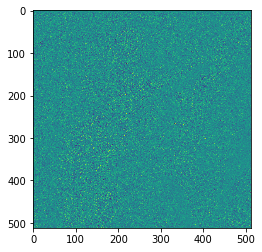

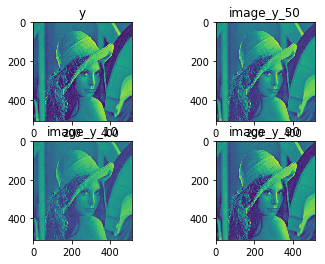

In [43]:
#%%timeit
#________________________Main Code Using Equations___________________________________


im=cv2.imread("lena_color.tiff")
imsize = im.shape
#plt.imshow (im)

yuv_image, y, u , v = RGB2YUV(im)
R, G,  B= im[:, :, 0], im[:, :, 1], im[:, :, 2]

image_y_50= np.zeros((imsize[0],imsize[1] ))
image_u= np.zeros((imsize[0],imsize[1] ))
image_v= np.zeros((imsize[0],imsize[1] ))

ylist_50 = np.zeros ((imsize[0]*imsize[1]))
ulist = np.zeros ((imsize[0]*imsize[1]))
vlist = np.zeros ((imsize[0]*imsize[1]))


# for the Y channel using Q50 
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        
        image_y_50[i:(i+8),j:(j+8)] = dct_2d(y[i:(i+8),j:(j+8)])
        image_y_50[i:(i+8),j:(j+8)] = quantization(image_y_50[i:(i+8),j:(j+8)],quantization_matrix_50)
        
        ylist_50 [i:(i+64)]= zigzag (image_y_50[i:(i+8),j:(j+8)] )
        image_y_50[i:(i+8),j:(j+8)] = zigzagInverse (ylist_50 [i:(i+64)])            

        image_y_50[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_50,image_y_50[i:(i+8),j:(j+8)])
        image_y_50[i:(i+8),j:(j+8)] = idct_2d(image_y_50[i:(i+8),j:(j+8)])
P1_50 = psnr(image_y_50, y)
print ('P_50=',P1_50)
#d1 = diff( y,image_y_50 )

# for the Y channel using Q10
image_y_10= np.zeros((imsize[0],imsize[1] ))

ylist_10 = np.zeros ((imsize[0]*imsize[1]))

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]: 
        
        image_y_10[i:(i+8),j:(j+8)] = dct_2d(y[i:(i+8),j:(j+8)])
        image_y_10[i:(i+8),j:(j+8)] = quantization(image_y_10[i:(i+8),j:(j+8)],quantization_matrix_10)
        
        ylist_10 [i:(i+64)]= zigzag (image_y_10[i:(i+8),j:(j+8)] )
        image_y_10[i:(i+8),j:(j+8)] = zigzagInverse (ylist_10 [i:(i+64)])            

        image_y_10[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_10,image_y_10[i:(i+8),j:(j+8)])
        image_y_10[i:(i+8),j:(j+8)] = idct_2d(image_y_10[i:(i+8),j:(j+8)])

P1_10 = psnr(image_y_10, y)
print ('P_10=',P1_10)
d2 = diff( y,image_y_10 )



# for the Y channel using Q90
image_y_90= np.zeros((imsize[0],imsize[1] ))

ylist_90 = np.zeros ((imsize[0]*imsize[1]))

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]: 
        
        image_y_90[i:(i+8),j:(j+8)] = dct_2d(y[i:(i+8),j:(j+8)])
        image_y_90[i:(i+8),j:(j+8)] = quantization(image_y_90[i:(i+8),j:(j+8)],quantization_matrix_90)
        
        ylist_90 [i:(i+64)]= zigzag (image_y_90[i:(i+8),j:(j+8)] )
        image_y_90[i:(i+8),j:(j+8)] = zigzagInverse (ylist_90 [i:(i+64)])            

        image_y_90[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_90,image_y_90[i:(i+8),j:(j+8)])
        image_y_90[i:(i+8),j:(j+8)] = idct_2d(image_y_90[i:(i+8),j:(j+8)])

P1_90 = psnr(image_y_90, y)
print ('P_90=',P1_90)
d3 = diff( y,image_y_90 )



f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(y)
axarr[0,0].set_title('y')
axarr[0,1].imshow(image_y_50)
axarr[0,1].set_title('image_y_50')
axarr[1,0].imshow(image_y_10)
axarr[1,0].set_title('image_y_10')
axarr[1,1].imshow(image_y_90)
axarr[1,1].set_title('image_y_90')



P_50= 33.199977327827135
P_10= 27.32452013018197
P_90= 39.358622781140376


Text(0.5, 1.0, 'image_y_90')

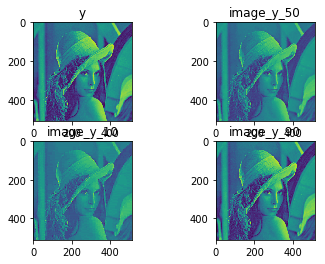

In [44]:
#%%timeit
#________________________Main Code Using Matrix Implementation___________________________________


im=cv2.imread("lena_color.tiff")
imsize = im.shape
#plt.imshow (im)

yuv_image, y, u , v = RGB2YUV(im)

image_y_50_m= np.zeros((imsize[0],imsize[1] ))
image_u= np.zeros((imsize[0],imsize[1] )) #################
image_v= np.zeros((imsize[0],imsize[1] ))##################

ylist_50_m = np.zeros ((imsize[0]*imsize[1]))
ulist = np.zeros ((imsize[0]*imsize[1]))
vlist = np.zeros ((imsize[0]*imsize[1]))


# for the Y channel using Q50 
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        
        image_y_50_m[i:(i+8),j:(j+8)] = DCT(y[i:(i+8),j:(j+8)])
        image_y_50_m[i:(i+8),j:(j+8)] = quantization(image_y_50_m[i:(i+8),j:(j+8)],quantization_matrix_50)
        
        ylist_50_m [i:(i+64)]= zigzag (image_y_50_m[i:(i+8),j:(j+8)] )
        image_y_50_m[i:(i+8),j:(j+8)] = zigzagInverse (ylist_50_m [i:(i+64)])            

        image_y_50_m[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_50,image_y_50_m[i:(i+8),j:(j+8)])
        image_y_50_m[i:(i+8),j:(j+8)] = inverse_DCT(image_y_50_m[i:(i+8),j:(j+8)])
P2_50= psnr(image_y_50_m, y)
print ('P_50=',P2_50)

# for the Y channel using Q10
image_y_10_m= np.zeros((imsize[0],imsize[1] ))

ylist_10_m = np.zeros ((imsize[0]*imsize[1]))

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]: 
        
        image_y_10_m[i:(i+8),j:(j+8)] = DCT(y[i:(i+8),j:(j+8)])
        image_y_10_m[i:(i+8),j:(j+8)] = quantization(image_y_10_m[i:(i+8),j:(j+8)],quantization_matrix_10)
        
        ylist_10_m [i:(i+64)]= zigzag (image_y_10_m[i:(i+8),j:(j+8)] )
        image_y_10_m[i:(i+8),j:(j+8)] = zigzagInverse (ylist_10_m [i:(i+64)])            

        image_y_10_m[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_10,image_y_10_m[i:(i+8),j:(j+8)])
        image_y_10_m[i:(i+8),j:(j+8)] = inverse_DCT(image_y_10_m[i:(i+8),j:(j+8)])

P2_10= psnr(image_y_10_m, y)
print ('P_10=',P2_10)

# for the Y channel using Q90
image_y_90_m= np.zeros((imsize[0],imsize[1] ))

ylist_90_m = np.zeros ((imsize[0]*imsize[1]))

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]: 
        
        image_y_90_m[i:(i+8),j:(j+8)] = DCT(y[i:(i+8),j:(j+8)])
        image_y_90_m[i:(i+8),j:(j+8)] = quantization(image_y_90_m[i:(i+8),j:(j+8)],quantization_matrix_90)
        
        ylist_90_m [i:(i+64)]= zigzag (image_y_90_m[i:(i+8),j:(j+8)] )
        image_y_90_m[i:(i+8),j:(j+8)] = zigzagInverse (ylist_90_m [i:(i+64)])            

        image_y_90_m[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_90,image_y_90_m[i:(i+8),j:(j+8)])
        image_y_90_m[i:(i+8),j:(j+8)] = inverse_DCT(image_y_90_m[i:(i+8),j:(j+8)])

P2_90= psnr(image_y_90_m, y)
print ('P_90=',P2_90)

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(y)
axarr[0,0].set_title('y')
axarr[0,1].imshow(image_y_50_m)
axarr[0,1].set_title('image_y_50')
axarr[1,0].imshow(image_y_10_m)
axarr[1,0].set_title('image_y_10')
axarr[1,1].imshow(image_y_90_m)
axarr[1,1].set_title('image_y_90')

P_50= 35.10330352841362
P_10= 30.04926903640232
P_90= 40.089923865610395


Text(0.5, 1.0, 'image_y_90')

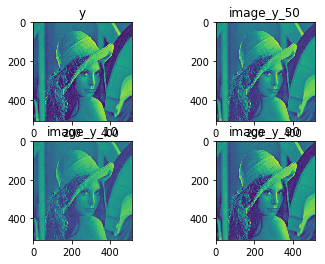

In [45]:
#%%timeit
#________________________Main Code Using Built in Functions___________________________________


im=cv2.imread("lena_color.tiff")
imsize = im.shape
#plt.imshow (im)

yuv_image, y, u , v = RGB2YUV(im)

image_y_50_b= np.zeros((imsize[0],imsize[1] ))
image_u= np.zeros((imsize[0],imsize[1] ))######################
image_v= np.zeros((imsize[0],imsize[1] ))##############

ylist_50_b = np.zeros ((imsize[0]*imsize[1]))
ulist = np.zeros ((imsize[0]*imsize[1]))
vlist = np.zeros ((imsize[0]*imsize[1]))


# for the Y channel using Q50 
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        
        image_y_50_b[i:(i+8),j:(j+8)] = dct2_builtin(y[i:(i+8),j:(j+8)])
        image_y_50_b[i:(i+8),j:(j+8)] = quantization(image_y_50_b[i:(i+8),j:(j+8)],quantization_matrix_50)
        
        ylist_50_b [i:(i+64)]= zigzag (image_y_50_b[i:(i+8),j:(j+8)] )
        image_y_50_b[i:(i+8),j:(j+8)] = zigzagInverse (ylist_50_b [i:(i+64)])            

        image_y_50_b[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_50,image_y_50_b[i:(i+8),j:(j+8)])
        image_y_50_b[i:(i+8),j:(j+8)] = idct2_builtin(image_y_50_b[i:(i+8),j:(j+8)])
P3_50 = psnr(image_y_50_b, y)
print ('P_50=',P3_50)


        
        


# for the Y channel using Q10
image_y_10_b= np.zeros((imsize[0],imsize[1] ))

ylist_10_b = np.zeros ((imsize[0]*imsize[1]))

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]: 
        
        image_y_10_b[i:(i+8),j:(j+8)] = dct2_builtin(y[i:(i+8),j:(j+8)])
        image_y_10_b[i:(i+8),j:(j+8)] = quantization(image_y_10_b[i:(i+8),j:(j+8)],quantization_matrix_10)
        
        ylist_10_b [i:(i+64)]= zigzag (image_y_10_b[i:(i+8),j:(j+8)] )
        image_y_10_b[i:(i+8),j:(j+8)] = zigzagInverse (ylist_10_b [i:(i+64)])            

        image_y_10_b[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_10,image_y_10_b[i:(i+8),j:(j+8)])
        image_y_10_b[i:(i+8),j:(j+8)] = idct2_builtin(image_y_10_b[i:(i+8),j:(j+8)])

P3_10 = psnr(image_y_10_b, y)
print ('P_10=',P3_10)

# for the Y channel using Q90
image_y_90_b= np.zeros((imsize[0],imsize[1] ))

ylist_90_b = np.zeros ((imsize[0]*imsize[1]))

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]: 
        
        image_y_90_b[i:(i+8),j:(j+8)] = dct2_builtin(y[i:(i+8),j:(j+8)])
        image_y_90_b[i:(i+8),j:(j+8)] = quantization(image_y_90_b[i:(i+8),j:(j+8)],quantization_matrix_90)
        
        ylist_90_b [i:(i+64)]= zigzag (image_y_90_b[i:(i+8),j:(j+8)] )
        image_y_90_b[i:(i+8),j:(j+8)] = zigzagInverse (ylist_90_b [i:(i+64)])            

        image_y_90_b[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_90,image_y_90_b[i:(i+8),j:(j+8)])
        image_y_90_b[i:(i+8),j:(j+8)] = idct2_builtin(image_y_90_b[i:(i+8),j:(j+8)])

P3_90 = psnr(image_y_90_b, y)
print ('P_90=',P3_90)

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(y)
axarr[0,0].set_title('y')
axarr[0,1].imshow(image_y_50_b)
axarr[0,1].set_title('image_y_50')
axarr[1,0].imshow(image_y_10_b)
axarr[1,0].set_title('image_y_10')
axarr[1,1].imshow(image_y_90_b)
axarr[1,1].set_title('image_y_90')

In [27]:
im=cv2.imread("lena_color.tiff")
imsize = im.shape
#plt.imshow (im)

yuv_image, y, u , v = RGB2YUV(im)

image_y_90_b= np.zeros((imsize[0],imsize[1] ))
ylist_90 = np.zeros ((imsize[0]*imsize[1]))
image_u_90_b= np.zeros((imsize[0],imsize[1] ))
ulist_90 = np.zeros ((imsize[0]*imsize[1]))
image_v_90_b= np.zeros((imsize[0],imsize[1] ))
vlist_90 = np.zeros ((imsize[0]*imsize[1]))

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]: 
        
        image_y_90_b[i:(i+8),j:(j+8)] = dct2_builtin(y[i:(i+8),j:(j+8)])
        image_y_90_b[i:(i+8),j:(j+8)] = quantization(image_y_90_b[i:(i+8),j:(j+8)],quantization_matrix_90)
        
        ylist_90 [i:(i+64)]= zigzag (image_y_90_b[i:(i+8),j:(j+8)] )
        image_y_90_b[i:(i+8),j:(j+8)] = zigzagInverse (ylist_90 [i:(i+64)])            

        image_y_90_b[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_90,image_y_90_b[i:(i+8),j:(j+8)])
        image_y_90_b[i:(i+8),j:(j+8)] = idct2_builtin(image_y_90_b[i:(i+8),j:(j+8)])

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]: 
        
        image_u_90_b[i:(i+8),j:(j+8)] = dct2_builtin(u[i:(i+8),j:(j+8)])
        image_u_90_b[i:(i+8),j:(j+8)] = quantization(image_u_90_b[i:(i+8),j:(j+8)],quantization_matrix_90)
        
        ulist_90 [i:(i+64)]= zigzag (image_u_90_b[i:(i+8),j:(j+8)] )
        image_u_90_b[i:(i+8),j:(j+8)] = zigzagInverse (ulist_90 [i:(i+64)])            

        image_u_90_b[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_90,image_u_90_b[i:(i+8),j:(j+8)])
        image_u_90_b[i:(i+8),j:(j+8)] = idct2_builtin(image_u_90_b[i:(i+8),j:(j+8)])
        
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]: 
        
        image_v_90_b[i:(i+8),j:(j+8)] = dct2_builtin(v[i:(i+8),j:(j+8)])
        image_v_90_b[i:(i+8),j:(j+8)] = quantization(image_v_90_b[i:(i+8),j:(j+8)],quantization_matrix_90)
        
        vlist_90 [i:(i+64)]= zigzag (image_v_90_b[i:(i+8),j:(j+8)] )
        image_v_90_b[i:(i+8),j:(j+8)] = zigzagInverse (vlist_90 [i:(i+64)])            

        image_v_90_b[i:(i+8),j:(j+8)] = inverse_quantization(quantization_matrix_90,image_v_90_b[i:(i+8),j:(j+8)])
        image_v_90_b[i:(i+8),j:(j+8)] = idct2_builtin(image_v_90_b[i:(i+8),j:(j+8)])

#newimage = np.dstack((image_y_90_b,image_v_90_b,image_y_90_b)
#plt.imshow(newimage)
# plt.savefig('newimage.png')
# newrgb = YUV2RGB (newimage)
# newrgb = np.clip(newrgb,0,1)
# P_90 = psnr(newimage, yuv_image)
# P_90_rgb = psnr(newrgb, im)
# print ('P_90=',P3_90)
# print ('P_90_rgb=',P_90_rgb)
# plt.imshow(newrgb)
# f, axarr = plt.subplots(2,2)
# axarr[0,0].imshow(yuv_image)
# axarr[0,0].set_title('yuv_image')
# axarr[0,1].imshow(newimage)
# axarr[0,1].set_title('newimage')

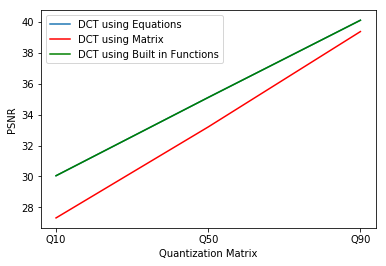

In [46]:
#________________________Plotting PSNR Graph ___________________________________

# x axis values 
x = ['Q10','Q50','Q90'] 
# corresponding y axis values 
y1 = [P1_10,P1_50,P1_90] 
y2 = [P2_10,P2_50,P2_90]
y3 = [P3_10,P3_50,P3_90]
  
# plotting the points  
plt.plot(x, y1, label= 'DCT using Equations', marker='')
plt.plot(x, y2, color='red', label = 'DCT using Matrix')
plt.plot(x, y3, color='green', label = 'DCT using Built in Functions')
  
# naming the x axis 
plt.xlabel('Quantization Matrix') 
# naming the y axis 
plt.ylabel('PSNR') 
  
# giving a title to my graph 
#plt.title('My first graph!') 
  
# function to show the plot 
 
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, image_y_90_b)

6.369245285775815